In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# criando dataframe
# df_lept_2018 = pd.read_csv("Leptospirose_2018.csv")
df = pd.read_csv("Raiva_Humana_2021.csv")

In [9]:
def decodifica_estados(df):
    
    # dicionario com as siglas dos estados para decodificação
    dicionario_estados = {12: 'AC', 27: 'AL', 16: 'AP', 13: 'AM', 29: 'BA', 23: 'CE', 53: 'DF', 32: 'ES', 52: 'GO', 21: 'MA', 51: 'MT', 50: 'MS', 31: 'MG', 15: 'PA', 25: 'PB', 41: 'PR', 26: 'PE', 22: 'PI', 24: 'RN', 43: 'RS', 33: 'RJ', 11: 'RO', 14: 'RR', 42: 'SC', 35: 'SP', 28: 'SE', 17: 'TO'}
    # mudando os indices da series para as siglas dos estados
    df.rename(index = dicionario_estados, inplace = True)

    print(df)

    return df

## 1. Quantos registros existem no arquivo de dados?

In [6]:
# 1. Quantos registros existem no arquivo de dados?
print("São", len(df.index), "registros no arquivo de dados")

São 198 registros no arquivo de dados


## 2. Quantos registros existem por município? a função deve retornar uma série do pandas (pd.Series)

In [17]:
# 2. Quantos registros existem por município? a função deve retornar uma série do pandas (pd.Series)
df_resposta = df.groupby(["ID_MUNICIP"])["ID_AGRAVO"].count()
print(type(df))
print(df_resposta)
print(type(df_resposta))

<class 'pandas.core.frame.DataFrame'>
ID_MUNICIP
110160    1
150140    1
160010    6
171620    1
210320    1
         ..
522140    1
522170    1
522190    1
522205    3
530010    2
Name: ID_AGRAVO, Length: 94, dtype: int64
<class 'pandas.core.series.Series'>


## 3. Qual sexo possui mais registros? Retorne uma tupla com o sexo mais numeroso e um dicionário tendo como chaves 'M' e 'F' para os sexos con a contagem de registros em cada sexo.

In [20]:
# 3. Qual sexo possui mais registros? Retorne uma tupla com o sexo mais numeroso e um dicionário tendo como chaves 'M' e 'F' para os sexos con a contagem de registros em cada sexo.
# retorna uma series
dicionario_sexo = dict(df.groupby(["CS_SEXO"])["ID_AGRAVO"].count())
print(dicionario_sexo)
print(max(dicionario_sexo, key=dicionario_sexo.get))
# retorna uma series
dicionario_sexo = dict(df.groupby(["CS_SEXO"])["ID_AGRAVO"].count())
max(dicionario_sexo, key=dicionario_sexo.get)

{'F': 94, 'M': 104}
M


## 4. Qual a idade média (em anos) dos registros? retorne um float

In [21]:
# 4. Qual a idade média (em anos) dos registros? retorne um float
# pegando uma coluna como series e calculando a média dessa coluna
print(df["idade_anos"].mean())

34.3598899958489


## 5. a coluna SG_UF_NOT contém a sigla (string, por exemplo 33: 'RJ') da unidade federativa. Qual a unidade federativa com mais registros? Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a quantidade de registros.

In [29]:
# 5. a coluna SG_UF_NOT contém a sigla (string, por exemplo 33: 'RJ') da unidade federativa. Qual a unidade federativa com mais registros? Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a quantidade de registros.
# pegando decodificação
# estados = pd.read_csv("codigos_estado.csv")
# # fazendo listas com os codigos
# estado = estados["estado"]
# codigo = estados["codigo"]
# dicionario_estados = dict(zip(codigo, estado))
dicionario_estados = {12: 'Acre', 27: 'Alagoas', 16: 'Amapá', 13: 'Amazonas', 29: 'Bahia', 23: 'Ceará', 53: 'Distrito Federal', 32: 'Espírito Santo', 52: 'Goiás', 21: 'Maranhão', 51: 'Mato Grosso', 50: 'Mato Grosso do Sul', 31: 'Minas Gerais', 15: 'Pará', 25: 'Paraíba', 41: 'Paraná', 26: 'Pernambuco', 22: 'Piauí', 24: 'Rio Grande do Norte', 43: 'Rio Grande do Sul', 33: 'Rio de Janeiro', 11: 'Rondônia', 14: 'Roraima', 42: 'Santa Catarina', 35: 'São Paulo', 28: 'Sergipe', 17: 'Tocantins'}
series_estados = df.groupby(["SG_UF_NOT"])["ID_AGRAVO"].count()
series_estados.rename(index = dicionario_estados, inplace = True)
dict(series_estados)
print(dict(series_estados))

{'Rondônia': 1, 'Pará': 1, 'Amapá': 6, 'Tocantins': 1, 'Maranhão': 16, 'Piauí': 13, 'Rio Grande do Norte': 8, 'Pernambuco': 3, 'Bahia': 1, 'Minas Gerais': 57, 'Rio de Janeiro': 6, 'São Paulo': 26, 'Paraná': 3, 'Santa Catarina': 5, 'Rio Grande do Sul': 3, 'Mato Grosso do Sul': 2, 'Mato Grosso': 26, 'Goiás': 18, 'Distrito Federal': 2}


## 6. Novamente usando a coluna SG_UF_NOT, qual a unidade federativa com mais registros de pessoas do sexo masculino? Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a quantidade de registros.

In [35]:
# 6. Novamente usando a coluna SG_UF_NOT, qual a unidade federativa com mais registros de pessoas do sexo masculino? Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a quantidade de registros.
sexos_retirar = ["F", "I"]
df = df[df.CS_SEXO.isin(sexos_retirar) == False]
# df["CS_SEXO"].nunique()


1

## 7. Descubra quantos municípios existem em cada unidade federativa (UF) (busque no google). determine, para a sua tabela de dados, que proporção dos munícípios de cada UF, tem pelo menos um registro. Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a proporção de municípios com pelo menos um registro.


In [26]:
# 7. Descubra quantos municípios existem em cada unidade federativa (UF) (busque no google). determine, para a sua tabela de dados, que proporção dos munícípios de cada UF, tem pelo menos um registro. Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a proporção de municípios com pelo menos um registro.
# # dataset com informações sobre os estado do Brasil
# municipios_por_estado = pd.read_csv("municipios_por_estado.csv")
# # salvando estados
# lista_estados = municipios_por_estado["estado"]
# # e a quantidade de municípios de cada um
# lista_municipios = municipios_por_estado["n_municipios"]
# # fazendo dicionario
dicionario_municipios_estados = {'MG': 853, 'SP': 645, 'RS': 497, 'BA': 417, 'PR': 399, 'SC': 295, 'GO': 246, 'PI': 224, 'PB': 223, 'MA': 217, 'PE': 184, 'CE': 184, 'RN': 167, 'PA': 144, 'MT': 141, 'TO': 139, 'AL': 102, 'RJ': 92, 'MS': 79, 'ES': 78, 'SE': 75, 'AM': 62, 'RO': 52, 'AC': 22, 'AP': 16, 'RR': 15}

df_contagem_estados = pd.DataFrame(df.groupby(["SG_UF_NOT"])["ID_MUNICIP"].nunique())

df_contagem_estados = decodifica_estados(df_contagem_estados)

# retirando distrito federal, pois não é um estado
df_contagem_estados.drop("DF", inplace = True)

# compara o dataframe com o dicionário e adiciona os valores do dicionário em uma colun do dataframe fazendo a correpondência entre o index do dataframe e a chave do dicionário
df_contagem_estados["n_municipios"] = [dicionario_municipios_estados.get(index) for index in df_contagem_estados.index]

df_contagem_estados["proporcao_municipios"] = round((df_contagem_estados["ID_MUNICIP"]/df_contagem_estados["n_municipios"] * 100))

print(df_contagem_estados)

           ID_MUNICIP
SG_UF_NOT            
RO                  1
PA                  1
AP                  1
TO                  1
MA                  3
PI                  8
RN                  5
PE                  2
BA                  1
MG                 21
RJ                  6
SP                 14
PR                  3
SC                  5
RS                  3
MS                  2
MT                  7
GO                  9
DF                  1
           ID_MUNICIP  n_municipios  proporcao_municipios
SG_UF_NOT                                                
RO                  1            52                   2.0
PA                  1           144                   1.0
AP                  1            16                   6.0
TO                  1           139                   1.0
MA                  3           217                   1.0
PI                  8           224                   4.0
RN                  5           167                   3.0
PE              

## 8. Usando o comando pd.to_datetime do Pandas, crie uma nova coluna chamada DT_NOTIFICACAO com o tipo datetime64[ns] a partir da coluna DT_NOTIFIC, e uma coluna DT_SINTOMAS também de tipo datetime64[ns]. A partir destas duas novas colunas calcule o número de dias de atraso entre os sintomas e a notificação e salve em uma coluna ATRASO_NOT.

In [44]:
# 8. Usando o comando pd.to_datetime do Pandas, crie uma nova coluna chamada DT_NOTIFICACAO com o tipo datetime64[ns] a partir da coluna DT_NOTIFIC, e uma coluna DT_SINTOMAS também de tipo datetime64[ns]. A partir destas duas novas colunas calcule o número de dias de atraso entre os sintomas e a notificação e salve em uma coluna ATRASO_NOT.
df_datas = df
df_datas["data_notificacao"] = pd.to_datetime(df_datas["DT_NOTIFIC"])
df_datas["data_sintomas"] = pd.to_datetime(df_datas["DT_SIN_PRI"])
display(df_datas)
df_datas["ATRASO_NOT"] = (df_datas["data_notificacao"] - df_datas["data_sintomas"]) / np.timedelta64(1, "D")
display(df_datas)

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,idade_anos,data_notficacao,data_sintomas,data_notificacao,ATRASO_NOT
0,2,A829,2021-01-05,202101,2021,52,520030,1792.0,7678665,2021-01-05,...,NaN,NaN,NaN,NaN,NaN,35.0,2021-01-05,2021-01-05,2021-01-05,0 days
1,2,A829,2021-01-05,202101,2021,52,520030,1792.0,2437309,2021-01-05,...,NaN,NaN,NaN,NaN,NaN,12.0,2021-01-05,2021-01-05,2021-01-05,0 days
2,2,A829,2021-01-07,202101,2021,35,354150,1573.0,2051249,2021-01-07,...,NaN,NaN,NaN,NaN,NaN,46.0,2021-01-07,2021-01-07,2021-01-07,0 days
3,2,A829,2021-01-07,202101,2021,51,510788,2911.0,2311593,2021-01-07,...,NaN,NaN,NaN,2021-02-02,NaN,61.0,2021-01-07,2021-01-07,2021-01-07,0 days
4,2,A829,2021-01-08,202101,2021,35,354150,1573.0,2051249,2021-01-08,...,NaN,NaN,NaN,NaN,NaN,59.0,2021-01-08,2021-01-08,2021-01-08,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2,A829,2021-12-29,202152,2021,42,421290,1553.0,2537818,2021-12-29,...,NaN,2022-01-04,NaN,NaN,NaN,39.0,2021-12-29,2021-12-29,2021-12-29,0 days
194,2,A829,2021-12-30,202152,2021,43,431000,1598.0,7426550,2021-12-30,...,NaN,2022-03-07,NaN,NaN,NaN,52.0,2021-12-30,2021-12-30,2021-12-30,0 days
195,2,A829,2021-12-30,202152,2021,22,220820,NaN,2490781,2021-12-30,...,NaN,2021-12-31,NaN,NaN,NaN,62.0,2021-12-30,2021-12-30,2021-12-30,0 days
196,2,A829,2021-12-30,202152,2021,31,314470,1451.0,2170132,2021-12-30,...,NaN,NaN,NaN,NaN,NaN,77.0,2021-12-30,2021-12-30,2021-12-30,0 days


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,idade_anos,data_notficacao,data_sintomas,data_notificacao,ATRASO_NOT
0,2,A829,2021-01-05,202101,2021,52,520030,1792.0,7678665,2021-01-05,...,NaN,NaN,NaN,NaN,NaN,35.0,2021-01-05,2021-01-05,2021-01-05,0.0
1,2,A829,2021-01-05,202101,2021,52,520030,1792.0,2437309,2021-01-05,...,NaN,NaN,NaN,NaN,NaN,12.0,2021-01-05,2021-01-05,2021-01-05,0.0
2,2,A829,2021-01-07,202101,2021,35,354150,1573.0,2051249,2021-01-07,...,NaN,NaN,NaN,NaN,NaN,46.0,2021-01-07,2021-01-07,2021-01-07,0.0
3,2,A829,2021-01-07,202101,2021,51,510788,2911.0,2311593,2021-01-07,...,NaN,NaN,NaN,2021-02-02,NaN,61.0,2021-01-07,2021-01-07,2021-01-07,0.0
4,2,A829,2021-01-08,202101,2021,35,354150,1573.0,2051249,2021-01-08,...,NaN,NaN,NaN,NaN,NaN,59.0,2021-01-08,2021-01-08,2021-01-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2,A829,2021-12-29,202152,2021,42,421290,1553.0,2537818,2021-12-29,...,NaN,2022-01-04,NaN,NaN,NaN,39.0,2021-12-29,2021-12-29,2021-12-29,0.0
194,2,A829,2021-12-30,202152,2021,43,431000,1598.0,7426550,2021-12-30,...,NaN,2022-03-07,NaN,NaN,NaN,52.0,2021-12-30,2021-12-30,2021-12-30,0.0
195,2,A829,2021-12-30,202152,2021,22,220820,NaN,2490781,2021-12-30,...,NaN,2021-12-31,NaN,NaN,NaN,62.0,2021-12-30,2021-12-30,2021-12-30,0.0
196,2,A829,2021-12-30,202152,2021,31,314470,1451.0,2170132,2021-12-30,...,NaN,NaN,NaN,NaN,NaN,77.0,2021-12-30,2021-12-30,2021-12-30,0.0


## 9. Calcule a média e desvio padrão do atraso de notificação por unidade federativa. Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a média e desvio padrão do atraso de notificação.

In [45]:
# 9. Calcule a média e desvio padrão do atraso de notificação por unidade federativa. Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a média e desvio padrão do atraso de notificação.

df_media = df_datas.groupby(["SG_UF_NOT"])["ATRASO_NOT"].mean()
df_desvio = df_datas.groupby(["SG_UF_NOT"])["ATRASO_NOT"].std()

display(df_media)
display(df_desvio)

# decodificando nomes dos estados
decodifica_estados(df_media)

# salvando medias e desvios em listas para colocar em tuplas no dicionário final
lista_medias = list(df_media)
lista_desvios = list(df_desvio)
tupla_medias_desvios = tuple(zip(lista_medias, lista_desvios))

dicionario_medias_desvios = dict(zip(df_media.index, tupla_medias_desvios))

print(dicionario_medias_desvios)

SG_UF_NOT
11     0.000000
15     0.000000
16     0.000000
17     0.000000
21     0.750000
22     2.307692
24     7.875000
26     2.666667
29     0.000000
31     1.122807
33     3.333333
35    29.576923
41    15.333333
42     1.000000
43     0.000000
50     0.000000
51     0.192308
52     2.055556
53     1.000000
Name: ATRASO_NOT, dtype: float64

SG_UF_NOT
11           NaN
15           NaN
16      0.000000
17           NaN
21      1.612452
22      4.289223
24     16.374523
26      1.527525
29           NaN
31      4.602290
33      6.055301
35    150.813308
41     25.696952
42      2.236068
43      0.000000
50      0.000000
51      0.491466
52      6.557189
53      1.414214
Name: ATRASO_NOT, dtype: float64

[0.0, 0.0, 0.0, 0.0, 0.75, 2.3076923076923075, 7.875, 2.6666666666666665, 0.0, 1.1228070175438596, 3.3333333333333335, 29.576923076923077, 15.333333333333334, 1.0, 0.0, 0.0, 0.19230769230769232, 2.0555555555555554, 1.0]
[nan, nan, 0.0, nan, 1.61245154965971, 4.289223227746009, 16.374522893812816, 1.5275252316519468, nan, 4.602290483469681, 6.0553007081949835, 150.81330792126352, 25.69695182961071, 2.2360679774997894, 0.0, 0.0, 0.4914656259988704, 6.557189338896948, 1.4142135623730951]
((0.0, nan), (0.0, nan), (0.0, 0.0), (0.0, nan), (0.75, 1.61245154965971), (2.3076923076923075, 4.289223227746009), (7.875, 16.374522893812816), (2.6666666666666665, 1.5275252316519468), (0.0, nan), (1.1228070175438596, 4.602290483469681), (3.3333333333333335, 6.0553007081949835), (29.576923076923077, 150.81330792126352), (15.333333333333334, 25.69695182961071), (1.0, 2.2360679774997894), (0.0, 0.0), (0.0, 0.0), (0.19230769230769232, 0.4914656259988704), (2.0555555555555554, 6.557189338896948), (1.0, 1.41

## 10. Calcule a média do atraso de notificação por município. Plote o número de notificações contra o atraso médio em cada município como um scatter plot.

,ATRASO_NOT,n_notificacoes
ID_MUNICIP,,
110160,0.000000,1
150140,0.000000,1
160010,0.000000,6
171620,0.000000,1
210320,3.000000,1
...,...,...
522140,3.000000,1
522170,28.000000,1
522190,1.000000,1


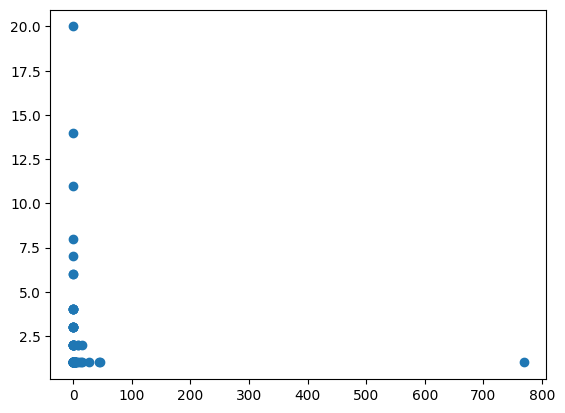

In [54]:
# 10. Calcule a média do atraso de notificação por município. Plote o número de notificações contra o atraso médio em cada município como um scatter plot.

# criando dataframe com municipios e a media para cada um
df_atraso_municipio = pd.DataFrame(df_datas.groupby(["ID_MUNICIP"])["ATRASO_NOT"].mean())

df_atraso_municipio["n_notificacoes"] = df.groupby(["ID_MUNICIP"])["ID_AGRAVO"].count()


display(df_atraso_municipio)

# fazendo gráfico
fig, plot_municipios = plt.subplots()
# plotando valores
plot_municipios.scatter(df_atraso_municipio["ATRASO_NOT"], df_atraso_municipio["n_notificacoes"])

In [6]:
# dataset com informações sobre os estado do Brasil
municipios_por_estado = pd.read_csv("municipios_por_estado.csv")
# salvando estados
lista_estados = municipios_por_estado["estado"]
# e a quantidade de municípios de cada um
lista_municipios = municipios_por_estado["n_municipios"]
# fazendo dicionario
dicionario_habitantes_municipios = dict(zip(lista_estados, lista_municipios))

,posicao,estado,regiao,n_municipios,n_habitantes_estado,media_habitantes_municipio
0,1,Minas Gerais,Sudeste,853,20 989 259,"24 606,40"
1,2,São Paulo,Sudeste,645,44 744 199,"69 370,85"
2,3,Rio Grande do Sul,Sul,497,11 290 773,"22 717,85"
3,4,Bahia,Nordeste,417,15 271 073,"36 621,28"
4,5,Paraná,Sul,399,11 241 665,"28 174,60"
5,6,Santa Catarina,Sul,295,6 882 793,"23 331,50"
6,7,Goiás,Centro-Oeste,246,6 690 173,"27 195,83"
7,8,Piauí,Nordeste,224,3 212 374,"14 340,96"
8,9,Paraíba,Nordeste,223,3 995 541,"17 917,22"
9,10,Maranhão,Nordeste,217,6 945 547,"32 007,13"


{'Minas Gerais': 853, 'São Paulo': 645, 'Rio Grande do Sul': 497, 'Bahia': 417, 'Paraná': 399, 'Santa Catarina': 295, 'Goiás': 246, 'Piauí': 224, 'Paraíba': 223, 'Maranhão': 217, 'Pernambuco': 184, 'Ceará': 184, 'Rio Grande do Norte': 167, 'Pará': 144, 'Mato Grosso': 141, 'Tocantins': 139, 'Alagoas': 102, 'Rio de Janeiro': 92, 'Mato Grosso do Sul': 79, 'Espírito Santo': 78, 'Sergipe': 75, 'Amazonas': 62, 'Rondônia': 52, 'Acre': 22, 'Amapá': 16, 'Roraima': 15}
